In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from scipy.stats import describe
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings("ignore")

In [4]:
file_path = '/content/drive/MyDrive/Indian politics/GE India 2024.xlsx'  # Replace with the correct path
file_path_02 = '/content/drive/MyDrive/Indian politics/phase_data.xlsx'

phases_load = ['Phase1','Phase2','Phase3','Phase4','Phase5','Phase6','Phase7']
phases = pd.concat(pd.read_excel(file_path_02, sheet_name=phases_load), ignore_index=True)
data = pd.read_excel(file_path, sheet_name='Final Result')
sheets_load = ['Final Result', 'Counted vs polled', 'Victory Margins']

data = pd.concat(pd.read_excel(file_path, sheet_name=sheets_load), ignore_index=True)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.N                   8902 non-null   float64
 1   Candidate             8902 non-null   object 
 2   Party                 8902 non-null   object 
 3   EVM Votes             8902 non-null   object 
 4   Postal Votes          8902 non-null   object 
 5   Total Votes           8902 non-null   object 
 6   % of Votes            8902 non-null   object 
 7   State                 9445 non-null   object 
 8   Constituency          9445 non-null   object 
 9   Victory Margin        1084 non-null   float64
 10  PC Name               544 non-null    object 
 11  EVM Votes Counted     544 non-null    float64
 12  Postal Votes Counted  544 non-null    float64
 13  EVM Votes Polled      544 non-null    float64
 14  Difference            544 non-null    float64
 15  Margin               

,S.N,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,State,Constituency,Victory Margin,PC Name,EVM Votes Counted,Postal Votes Counted,EVM Votes Polled,Difference,Margin,Difference > Margin,Postalvotes > Margin
0,1.0,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436,50.58,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,24396.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040,38.54,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254,4.08,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017,2.97,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,V.K. ABDUL AZIZ,Independent,2195,8,2203,1.09,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.columns


Index(['S.N', 'Candidate', 'Party', 'EVM Votes', 'Postal Votes', 'Total Votes',
       '% of Votes', 'State', 'Constituency', 'Victory Margin', 'PC Name',
       'EVM Votes Counted', 'Postal Votes Counted', 'EVM Votes Polled',
       'Difference', 'Margin', 'Difference > Margin', 'Postalvotes > Margin'],
      dtype='object')

In [6]:
print('Data Cleaning and Preprocessing')

Data Cleaning and Preprocessing


In [7]:
data['EVM Votes'] = pd.to_numeric(data['EVM Votes'], errors='coerce')
data['Postal Votes'] = pd.to_numeric(data['Postal Votes'], errors='coerce')
data['Total Votes'] = pd.to_numeric(data['Total Votes'], errors='coerce')
data['% of Votes'] = pd.to_numeric(data['% of Votes'].str.replace('%', ''), errors='coerce')

In [8]:
data['EVM Votes'].fillna(data['EVM Votes'].median(), inplace=True)
data['Postal Votes'].fillna(0, inplace=True)  # Assuming no postal votes if missing
data['Total Votes'].fillna(data['Total Votes'].median(), inplace=True)

In [9]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.N                   8902 non-null   float64
 1   Candidate             8902 non-null   object 
 2   Party                 8902 non-null   object 
 3   EVM Votes             9989 non-null   float64
 4   Postal Votes          9989 non-null   float64
 5   Total Votes           9989 non-null   float64
 6   % of Votes            0 non-null      float64
 7   State                 9445 non-null   object 
 8   Constituency          9445 non-null   object 
 9   Victory Margin        1084 non-null   float64
 10  PC Name               544 non-null    object 
 11  EVM Votes Counted     544 non-null    float64
 12  Postal Votes Counted  544 non-null    float64
 13  EVM Votes Polled      544 non-null    float64
 14  Difference            544 non-null    float64
 15  Margin               

,S.N,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes,State,Constituency,Victory Margin,PC Name,EVM Votes Counted,Postal Votes Counted,EVM Votes Polled,Difference,Margin,Difference > Margin,Postalvotes > Margin
0,1.0,BISHNU PADA RAY,Bharatiya Janata Party,102182.0,254.0,102436.0,NaN,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,24396.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,KULDEEP RAI SHARMA,Indian National Congress,77829.0,211.0,78040.0,NaN,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236.0,18.0,8254.0,NaN,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,D AYYAPPAN,Communist Party of India (Marxist),6009.0,8.0,6017.0,NaN,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,V.K. ABDUL AZIZ,Independent,2195.0,8.0,2203.0,NaN,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
victory_margin = data['Victory Margin']
percentage_of_votes = data['% of Votes']

data.drop(columns=['Victory Margin', '% of Votes'], inplace =True )

In [11]:
print(data.isnull().sum())

S.N                     1087
Candidate               1087
Party                   1087
EVM Votes                  0
Postal Votes               0
Total Votes                0
State                    544
Constituency             544
PC Name                 9445
EVM Votes Counted       9445
Postal Votes Counted    9445
EVM Votes Polled        9445
Difference              9445
Margin                  9447
Difference > Margin     9446
Postalvotes > Margin    9447
dtype: int64


In [12]:
print('Exploratory Data Analysis')

Exploratory Data Analysis


In [13]:
numeric_cols = data.select_dtypes(include='number').columns.tolist()
non_numeric_cols = data.select_dtypes(exclude='number').columns.tolist()

print('Numeric Columns: ', numeric_cols)
print('Non-Numeric Columns: ', non_numeric_cols)

Numeric Columns:  ['S.N', 'EVM Votes', 'Postal Votes', 'Total Votes', 'EVM Votes Counted', 'Postal Votes Counted', 'EVM Votes Polled', 'Difference', 'Margin', 'Difference > Margin', 'Postalvotes > Margin']
Non-Numeric Columns:  ['Candidate', 'Party', 'State', 'Constituency', 'PC Name']


In [14]:
numeric_cols = data.select_dtypes(include='number')
numeric_descriptive_stats = numeric_cols.describe()

imputer = SimpleImputer(strategy='mean')
numeric_cols_imputed = pd.DataFrame(imputer.fit_transform(numeric_cols), columns=numeric_cols.columns, index=numeric_cols.index)

detailed_stats = {}
for col in numeric_cols.columns:
    if numeric_cols[col].dtype == 'float64' or numeric_cols[col].dtype == 'int64':
        detailed_stats[col] = describe(numeric_cols[col])

In [15]:
# Here 'nobs' represents the count of non-missing (non-null) values in the dataset.
stats_dict = {
    'count': [result.nobs for result in detailed_stats.values()],
    'mean': [result.mean for result in detailed_stats.values()],
    'std': [result.variance**0.5 for result in detailed_stats.values()],
    'min': [result.minmax[0] for result in detailed_stats.values()],
    '25%': [result.minmax[0] for result in detailed_stats.values()],
    '50%': [result.minmax[0] for result in detailed_stats.values()],
    '75%': [result.minmax[1] for result in detailed_stats.values()],
    'max': [result.minmax[1] for result in detailed_stats.values()],
    'skewness': [result.skewness for result in detailed_stats.values()],
    'curtosis': [result.kurtosis for result in detailed_stats.values()]
}

In [16]:
detailed_stats_data = pd.DataFrame(stats_dict, index=numeric_cols_imputed.columns)
non_numeric_cols = data.select_dtypes(exclude='number')
non_numeric_cols_filled = non_numeric_cols.fillna('Missing')
non_numeric_freq = non_numeric_cols_filled.apply(lambda x: x.value_counts())

In [18]:
print("Numeric Columns Descriptive Statistics: ")
print(numeric_descriptive_stats)
print("\nDetailed Numeric Statistics:")
print(detailed_stats_data)
print("\nNon-Numeric Columns Frequency Counts:")
print(non_numeric_freq)

Numeric Columns Descriptive Statistics: 
               S.N     EVM Votes  Postal Votes   Total Votes  \
count  8902.000000  9.989000e+03   9989.000000  9.989000e+03   
mean     10.818243  6.453415e+04    374.863149  6.491032e+04   
std       8.252271  1.702314e+05   1271.380361  1.712097e+05   
min       1.000000  5.800000e+01      0.000000  6.100000e+01   
25%       5.000000  1.212000e+03      2.000000  1.224000e+03   
50%       9.000000  2.769000e+03      7.000000  2.781000e+03   
75%      15.000000  7.899000e+03     37.000000  7.919000e+03   
max      55.000000  1.468549e+06  19827.000000  1.471885e+06   

       EVM Votes Counted  Postal Votes Counted  EVM Votes Polled  \
count       5.440000e+02          5.440000e+02      5.440000e+02   
mean        2.358893e+06          1.376657e+04      2.360803e+06   
std         2.745965e+07          1.603286e+05      2.748188e+07   
min         0.000000e+00          0.000000e+00      0.000000e+00   
25%         1.053256e+06          3.259250

In [19]:
non_numeric_info = non_numeric_cols.info()
print(non_numeric_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Candidate     8902 non-null   object
 1   Party         8902 non-null   object
 2   State         9445 non-null   object
 3   Constituency  9445 non-null   object
 4   PC Name       544 non-null    object
dtypes: object(5)
memory usage: 390.3+ KB
None


In [20]:
non_numeric_cols

,Candidate,Party,State,Constituency,PC Name
0,BISHNU PADA RAY,Bharatiya Janata Party,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN
1,KULDEEP RAI SHARMA,Indian National Congress,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN
2,MANOJ PAUL,Andaman Nicobar Democratic Congress,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN
3,D AYYAPPAN,Communist Party of India (Marxist),Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN
4,V.K. ABDUL AZIZ,Independent,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN
...,...,...,...,...,...
9984,NaN,NaN,NaN,Wardha,NaN
9985,NaN,NaN,NaN,Wayanad,NaN
9986,NaN,NaN,NaN,West Delhi,NaN
9987,NaN,NaN,NaN,Yavatmal- Washim,NaN


In [21]:
for column in non_numeric_cols.columns:
    print(non_numeric_cols[column].value_counts())

Candidate
NOTA                 542
MANOJ KUMAR            9
ASHOK KUMAR            7
ARUN KUMAR             7
SUNIL KUMAR            6
                    ... 
M MUKESH               1
N K PREMACHANDRAN      1
N KESHAVA NAYAK        1
BALAKRISHNAN N         1
RAMPRASAD GHORAI       1
Name: count, Length: 8099, dtype: int64
Party
Independent                     3920
None of the Above                542
Bahujan Samaj Party              488
Bharatiya Janata Party           441
Indian National Congress         328
                                ... 
Republican Sena                    1
Rashtriya Janmanch (Secular)       1
Adarsh Nyay Rakshak Party          1
Aapka Gantantra Party              1
Indian Unity Centre                1
Name: count, Length: 746, dtype: int64
State
Maharashtra                             1217
Tamil Nadu                              1028
Uttar Pradesh                           1011
West Bengal                              591
Bihar                                

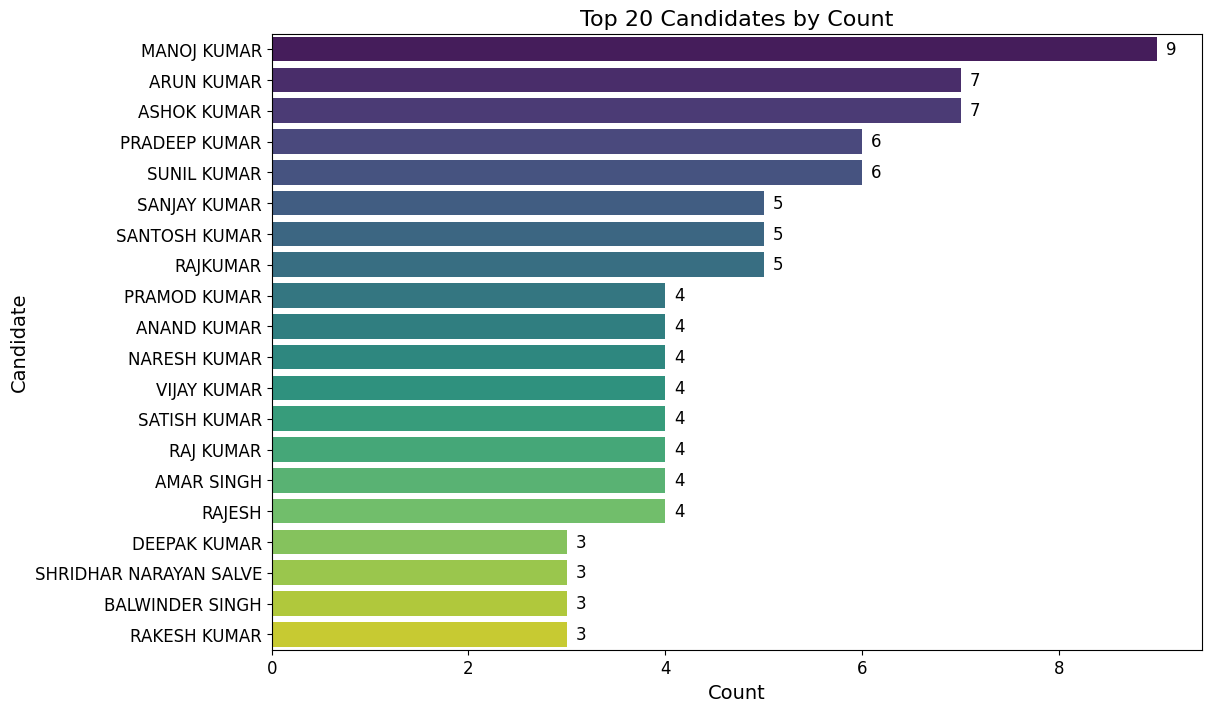

In [22]:
candidate_counts = data[data['Candidate'] != 'NOTA']['Candidate'].value_counts()


plt.figure(figsize=(12, 8))
sns.barplot(x=candidate_counts[:20], y=candidate_counts[:20].index, palette='viridis')
plt.title('Top 20 Candidates by Count', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Candidate', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate bar scores
max_count = candidate_counts[:20].max()
for i, count in enumerate(candidate_counts[:20]):
    plt.text(count + max_count * 0.01, i, str(count), va='center', fontsize=12, color='black')

plt.show()

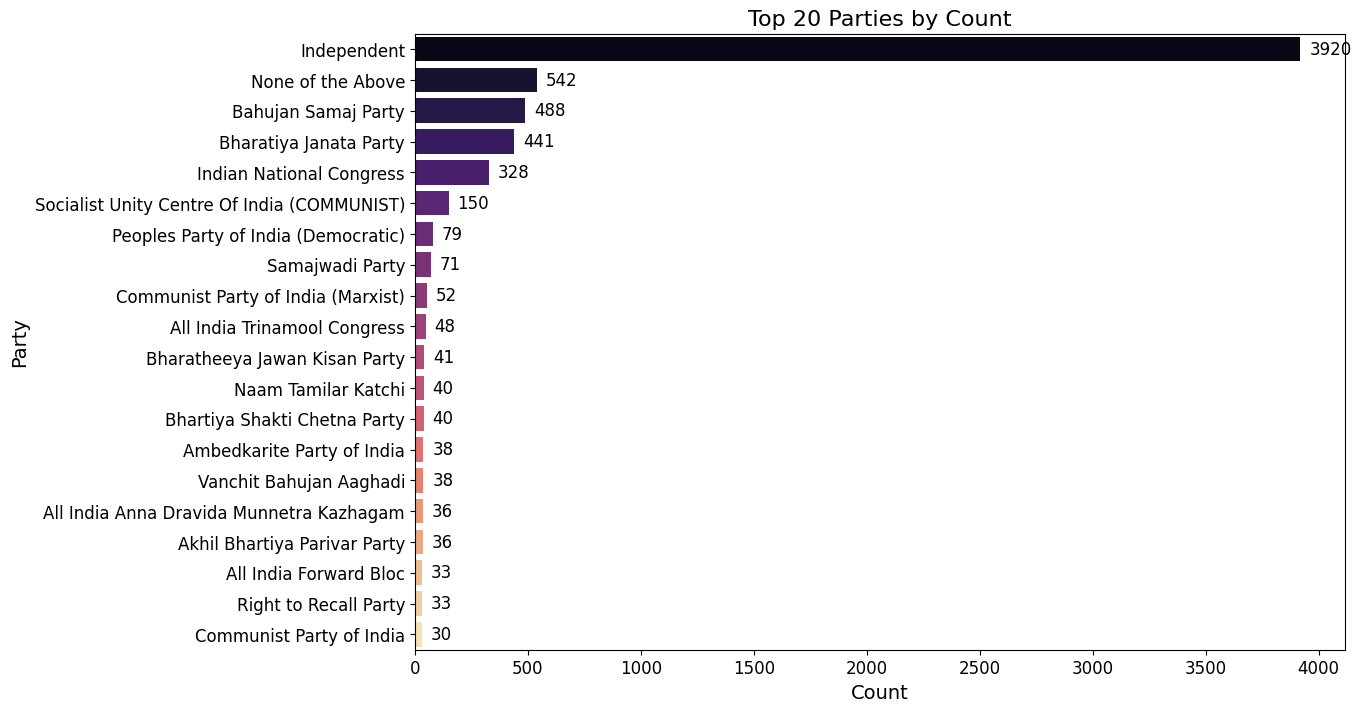

In [23]:
party_counts = data['Party'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=party_counts[:20], y=party_counts[:20].index, palette='magma')
plt.title('Top 20 Parties by Count', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Party', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate bar scores
max_count = party_counts[:20].max()
for i, count in enumerate(party_counts[:20]):
    plt.text(count + max_count * 0.01, i, str(count), va='center', fontsize=12, color='black')

plt.show()

In [24]:
print('Voter Turnout Analysis')

Voter Turnout Analysis


In [25]:
total_votes = data['Total Votes']
turnout_mean  = total_votes.mean()
turnout_median  = total_votes.median()
turnout_mode  = total_votes.mode()
turnout_std  = total_votes.std()
turnout_q1 =  total_votes.quantile(0.25)
turnout_q3 =  total_votes.quantile(0.75)
turnout_iqr = turnout_q3 - turnout_q1
turnout_skewness = total_votes.skew()
turnout_kurtosis = total_votes.kurtosis()

print("Voter Turnout Analysis:")
print("- Mean Turnout:", turnout_mean)
print("- Median Turnout:", turnout_median)
print("- Standard Deviation of Turnout:", turnout_std)
print("- 25th Percentile (Q1) Turnout:", turnout_q1)
print("- 75th Percentile (Q3) Turnout:", turnout_q3)
print("- Interquartile Range (IQR) of Turnout:", turnout_iqr)
print("- Skewness of Turnout:", turnout_skewness)
print("- Kurtosis of Turnout:", turnout_kurtosis)

Voter Turnout Analysis:
- Mean Turnout: 64910.31865051557
- Median Turnout: 2781.0
- Standard Deviation of Turnout: 171209.7274122335
- 25th Percentile (Q1) Turnout: 1224.0
- 75th Percentile (Q3) Turnout: 7919.0
- Interquartile Range (IQR) of Turnout: 6695.0
- Skewness of Turnout: 2.919495075860898
- Kurtosis of Turnout: 7.889421819798367


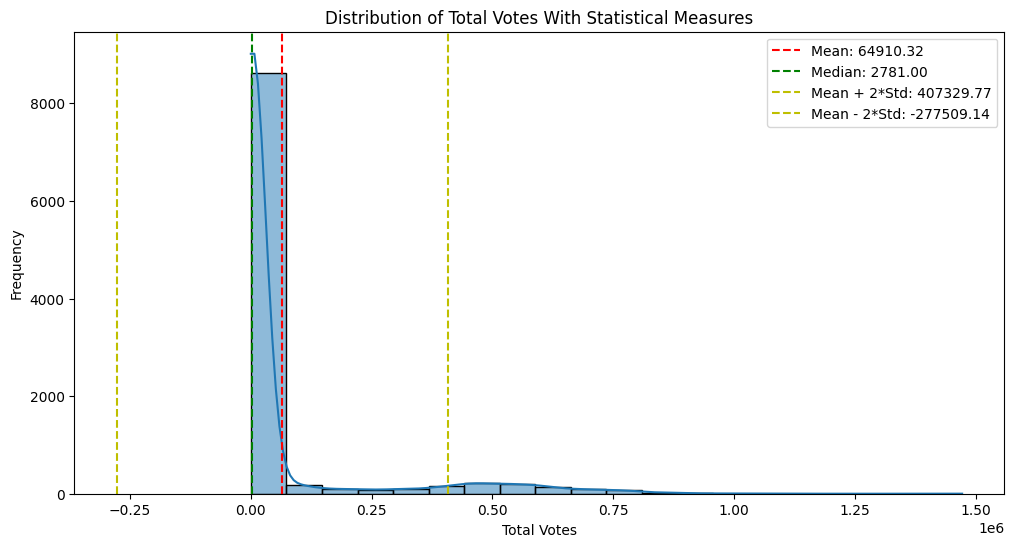

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(total_votes, bins=20, kde=True)
plt.axvline(turnout_mean, color='r', linestyle='--', label=f"Mean: {turnout_mean:.2f}")
plt.axvline(turnout_median, color='g', linestyle='--', label=f'Median: {turnout_median:.2f}')
plt.axvline(turnout_mean + 2*turnout_std, color='y', linestyle='--', label=f'Mean + 2*Std: {turnout_mean + 2*turnout_std:.2f}')
plt.axvline(turnout_mean - 2*turnout_std, color='y', linestyle='--', label=f'Mean - 2*Std: {turnout_mean - 2*turnout_std:.2f}')

plt.title('Distribution of Total Votes With Statistical Measures')
plt.xlabel('Total Votes')
plt.ylabel('Frequency')
plt.legend()
plt.show()

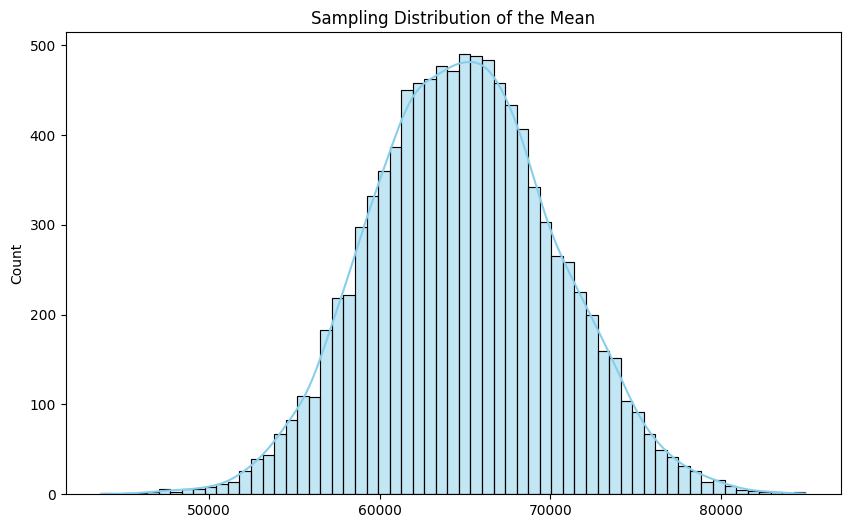

In [27]:
num_samples = len(data)
sample_size = 1000

sample_means = np.zeros(num_samples)

for i in range(num_samples):
    sample = np.random.choice(data['Total Votes'], size=sample_size, replace=True)
    sample_means[i] = np.mean(sample)

plt.figure(figsize=(10,6))
sns.histplot(sample_means, kde=True, color='skyblue')
plt.title('Sampling Distribution of the Mean')
plt.show()

In [28]:
print('Vote Sharing')
data.replace('-', pd.NA, inplace=True)
data['Total Votes'] = pd.to_numeric(data['Total Votes'], errors='coerce')

data = data.dropna(subset=['Total Votes'])
data['Total Constituency Votes'] = data.groupby('Constituency')['Total Votes'].transform('sum')

# vote share as percentage for each candidate
data['Vote Share'] = (data['Total Votes'] / data['Total Constituency Votes']) * 100
party_vote_share = data.groupby('Party')['Vote Share'].sum().reset_index()
party_vote_share['Normalized Vote Share'] = (party_vote_share['Vote Share'] / party_vote_share['Vote Share'].sum()) * 100

top_parties = party_vote_share.sort_values(by='Normalized Vote Share', ascending=False).head(20)

Vote Sharing


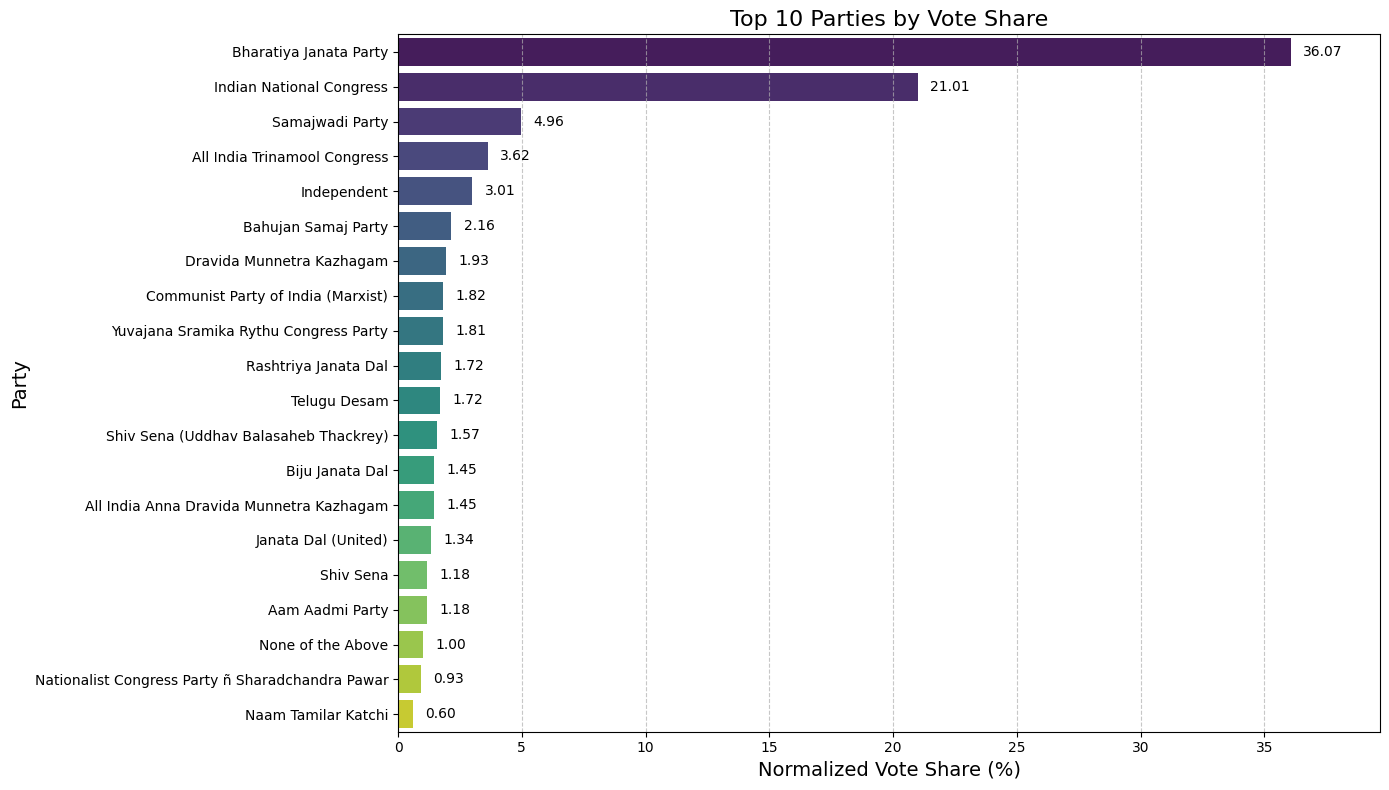

In [29]:
plt.figure(figsize=(14,8))
ax = sns.barplot(data=top_parties, x='Normalized Vote Share', y='Party', palette='viridis')

for i, v in enumerate(top_parties['Normalized Vote Share']):
    ax.text(v + 0.5, i, f"{v:.2f}", color='black', va='center')

plt.title('Top 10 Parties by Vote Share', fontsize=16)
plt.xlabel('Normalized Vote Share (%)', fontsize=14)
plt.ylabel('Party', fontsize=14)

plt.xlim(0, top_parties['Normalized Vote Share'].max() * 1.1)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [30]:
data['EVM Z-Score'] = (data['EVM Votes'] - data['EVM Votes'].mean()) / data['EVM Votes'].std()
data['Postal Z-Score'] = (data['Postal Votes'] - data['Postal Votes'].mean()) / data['Postal Votes'].std()

# Flag anomalies with Z-score > 3 or < -3
data['EVM Anomaly'] = np.abs(data['EVM Z-Score']) > 3
data['Postal Anomaly'] = np.abs(data['Postal Z-Score']) > 3

evm_anomalies = data[data['EVM Anomaly']]
postal_anomalies = data[data['Postal Anomaly']]

print("\nEVM Vote Anomalies:\n", evm_anomalies[['Candidate', 'Constituency', 'EVM Votes', 'EVM Z-Score']])
print("\nPostal Vote Anomalies:\n", postal_anomalies[['Candidate', 'Constituency', 'Postal Votes', 'Postal Z-Score']])


EVM Vote Anomalies:
                              Candidate         Constituency  EVM Votes  \
13               G M HARISH (BALAYOGI)  Amalapuram (SC) - 7   786149.0   
29                          C.M.RAMESH       Anakapalle - 5   750027.0   
45    AMBICA G LAKSHMINARAYANA VALMIKI      Ananthapur - 19   755862.0   
81              KRISHNA PRASAD TENNETI    Bapatla (SC) - 15   706757.0   
97              DAGGUMALLA PRASADA RAO    Chittoor(SC) - 25   765536.0   
...                                ...                  ...        ...   
8860               MUKUT MANI ADHIKARI        Ranaghat - 13   592276.0   
8867                   KALYAN BANERJEE       Srerampur - 27   671865.0   
8879              ABHIJIT GANGOPADHYAY          Tamluk - 30   761183.0   
8880            DEBANGSHU BHATTACHARYA          Tamluk - 30   683955.0   
8889                       SAJDA AHMED        Uluberia - 26   722586.0   

      EVM Z-Score  
13       4.239023  
29       4.026829  
45       4.061106  
81       

In [31]:
print('EVM and Postal Voting Analysis')
data = data[data['Postal Votes'] > 0]
evm_votes_mean = data['EVM Votes'].mean()
postal_votes_mean = data['Postal Votes'].mean()

print("Number of negative or zero EVM Votes:", (data['EVM Votes'] <= 0).sum())
print("Number of negative or zero Postal Votes:", (data['Postal Votes'] <= 0).sum())

EVM and Postal Voting Analysis
Number of negative or zero EVM Votes: 0
Number of negative or zero Postal Votes: 0


In [32]:
data['EVM Votes'].value_counts().sum()

8324

In [33]:
data['Postal Votes'].value_counts().sum()


8324

Correlation Between EVM Votes and Postal Votes: 0.7636279409286912


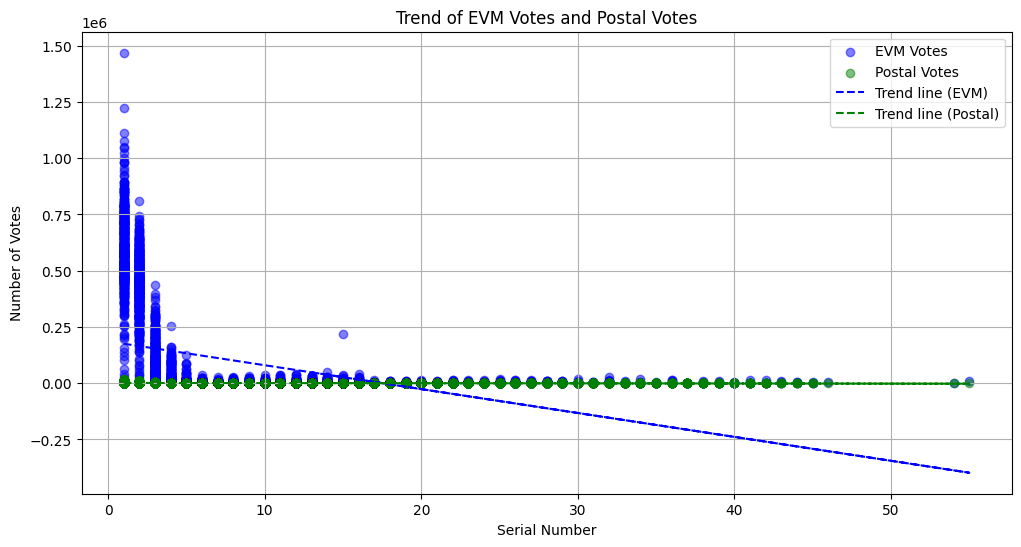

In [34]:
X = data['S.N'].values.reshape(-1,1)
y_evm = data['EVM Votes'].values.reshape(-1,1)
y_postal = data['Postal Votes'].values.reshape(-1,1)

model_evm = LinearRegression().fit(X, y_evm)
model_postal = LinearRegression().fit(X, y_postal)

y_evm_predict = model_evm.predict(X)
y_postal_predict = model_postal.predict(X)

correlation, _ = pearsonr(data['EVM Votes'], data['Postal Votes'])
print("Correlation Between EVM Votes and Postal Votes:", correlation)


plt.figure(figsize=(12, 6))
plt.scatter(data['S.N'], data['EVM Votes'], label='EVM Votes', color='blue', alpha=0.5)
plt.scatter(data['S.N'], data['Postal Votes'], label='Postal Votes', color='green', alpha=0.5)
plt.plot(data['S.N'], y_evm_predict, color='blue', linestyle='--', label='Trend line (EVM)')
plt.plot(data['S.N'], y_postal_predict, color='green', linestyle='--', label='Trend line (Postal)')
plt.xlabel('Serial Number')
plt.ylabel('Number of Votes')
plt.title('Trend of EVM Votes and Postal Votes')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
print('Victory Margin')
victory_margins = pd.read_excel(file_path, sheet_name='Victory Margins')
merged_data = pd.merge(data, victory_margins, on='Constituency', how='left')

merged_data.info()
merged_data.head()

Victory Margin
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8324 entries, 0 to 8323
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   S.N                       8324 non-null   float64
 1   Candidate                 8324 non-null   object 
 2   Party                     8324 non-null   object 
 3   EVM Votes                 8324 non-null   float64
 4   Postal Votes              8324 non-null   float64
 5   Total Votes               8324 non-null   float64
 6   State                     8324 non-null   object 
 7   Constituency              8324 non-null   object 
 8   PC Name                   0 non-null      object 
 9   EVM Votes Counted         0 non-null      float64
 10  Postal Votes Counted      0 non-null      float64
 11  EVM Votes Polled          0 non-null      float64
 12  Difference                0 non-null      float64
 13  Margin                    0 non-null      float6

,S.N,Candidate,Party,EVM Votes,Postal Votes,Total Votes,State,Constituency,PC Name,EVM Votes Counted,...,Margin,Difference > Margin,Postalvotes > Margin,Total Constituency Votes,Vote Share,EVM Z-Score,Postal Z-Score,EVM Anomaly,Postal Anomaly,Victory Margin
0,1.0,BISHNU PADA RAY,Bharatiya Janata Party,102182.0,254.0,102436.0,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,...,NaN,NaN,NaN,202514.0,50.582182,0.221157,-0.095065,False,False,NaN
1,2.0,KULDEEP RAI SHARMA,Indian National Congress,77829.0,211.0,78040.0,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,...,NaN,NaN,NaN,202514.0,38.535607,0.078099,-0.128886,False,False,NaN
2,3.0,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236.0,18.0,8254.0,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,...,NaN,NaN,NaN,202514.0,4.075768,-0.330715,-0.280690,False,False,NaN
3,4.0,D AYYAPPAN,Communist Party of India (Marxist),6009.0,8.0,6017.0,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,...,NaN,NaN,NaN,202514.0,2.971153,-0.343798,-0.288555,False,False,NaN
4,5.0,V.K. ABDUL AZIZ,Independent,2195.0,8.0,2203.0,Andaman & Nicobar Islands,Andaman & Nicobar Islands - 1,NaN,NaN,...,NaN,NaN,NaN,202514.0,1.087826,-0.366202,-0.288555,False,False,NaN


In [36]:
victory_margins

,Constituency,Victory Margin
0,Adilabad,90652.0
1,Agra,271294.0
2,Ahmedabad East,461755.0
3,Ahmedabad West,286437.0
4,Ahmednagar,28929.0
...,...,...
538,Wardha,81648.0
539,Wayanad,364422.0
540,West Delhi,199013.0
541,Yavatmal- Washim,94473.0


In [37]:
null_margins = victory_margins.isnull().sum()
# Showing only rows
null_rows = victory_margins.isnull()
null_rows.head()

,Constituency,Victory Margin
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


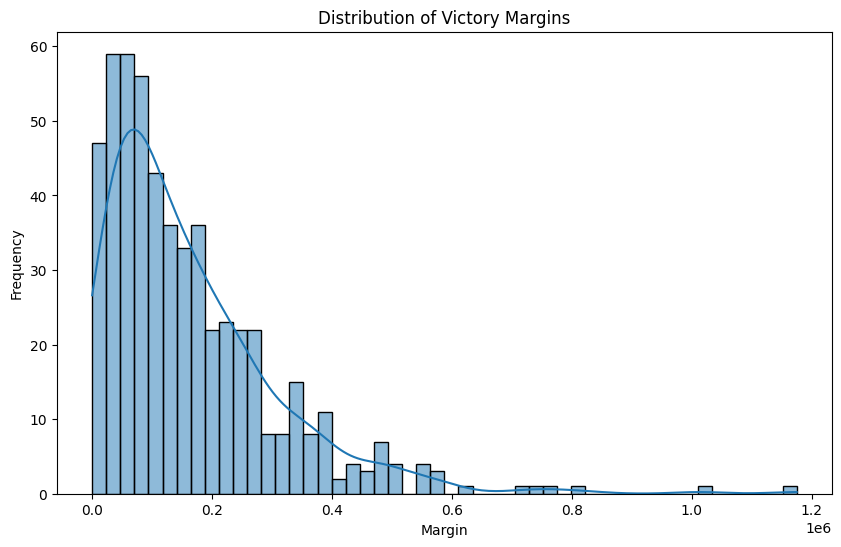

Top 10 PCs by Victory Margins:
         Constituency  Victory Margin
222           INDORE       1175092.0
155           Dhubri       1012476.0
531          VIDISHA        821408.0
383          Navsari        773551.0
182      Gandhinagar        744716.0
157  Diamond harbour        710930.0
513     Tripura West        611578.0
525         Vadodara        582126.0
426           RAIPUR        575285.0
509       TIRUVALLUR        572155.0
Bottom 10 PCs by Victory Margins:
           Constituency  Victory Margin
357  Mumbai North West            48.0
40            Attingal           684.0
229       JAIPUR RURAL          1615.0
264             KANKER          1884.0
116         Chandigarh          2504.0
205           Hamirpur          2629.0
312        Lakshadweep          2647.0
175        Farrukhabad          2678.0
62            Bansgaon          3150.0
180           Firozpur          3242.0


In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(victory_margins['Victory Margin'], bins=50, kde=True)
plt.title('Distribution of Victory Margins')
plt.xlabel('Margin')
plt.ylabel('Frequency')
plt.show()

top_10_margins = victory_margins.nlargest(10, 'Victory Margin')
bottom_10_margins = victory_margins.nsmallest(10, 'Victory Margin')

print("Top 10 PCs by Victory Margins:\n", top_10_margins[['Constituency', 'Victory Margin']])
print("Bottom 10 PCs by Victory Margins:\n", bottom_10_margins[['Constituency', 'Victory Margin']])

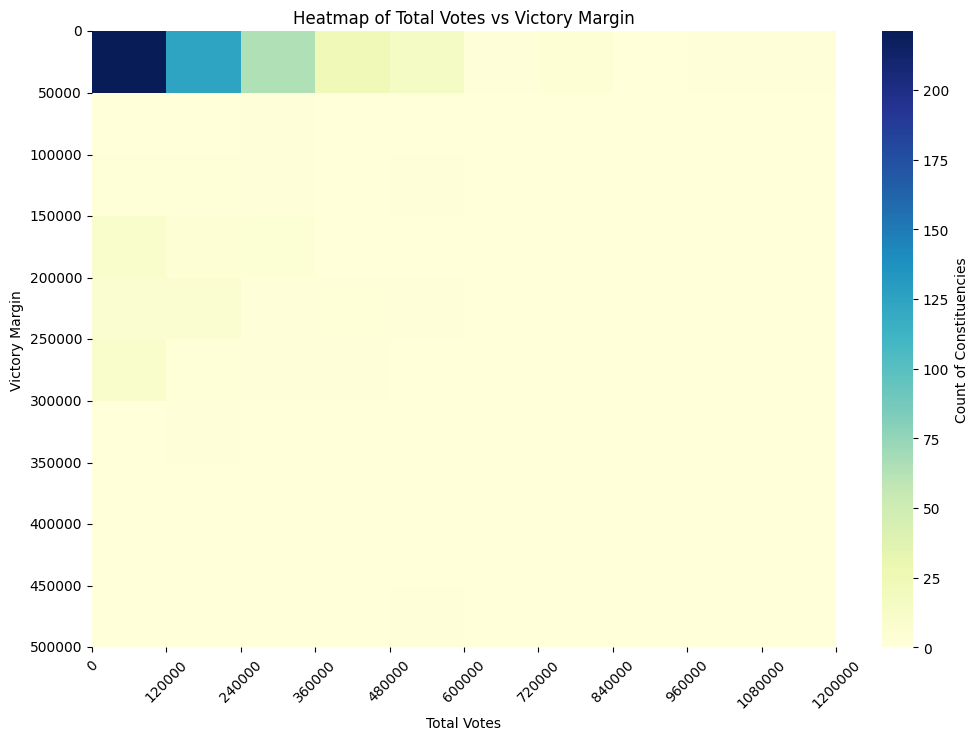

In [39]:
bins_total_votes = pd.cut(data['Total Votes'], bins=10)
bins_victory_margin = pd.cut(victory_margins['Victory Margin'], bins=10)

pivot_table = pd.pivot_table(data, values='Total Votes', index=bins_total_votes, columns=bins_victory_margin, aggfunc='count')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', cbar_kws={'label': 'Count of Constituencies'}, annot=False)

x_ticks = [f'{i * 120000}' for i in range(11)]  # Total Votes ranges from 0 to approximately 1,200,000 in steps of 120,000
y_ticks = [f'{i * 50000}' for i in range(11)]   # Victory Margin ranges from 0 to about 500,000 in steps of 50,000
plt.xticks(range(11), x_ticks, rotation=45)
plt.yticks(range(11), y_ticks)

plt.title('Heatmap of Total Votes vs Victory Margin')
plt.xlabel('Total Votes')
plt.ylabel('Victory Margin')
plt.show()

In [40]:
phases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sl. No.            549 non-null    object 
 1   State              543 non-null    object 
 2   PC Name            543 non-null    object 
 3   Count of
Elector*  395 non-null    float64
 4   **Poll (%)         344 non-null    float64
 5   Count of
Votes***  492 non-null    float64
 6   Count of Elector*  155 non-null    float64
 7   **Poll
(%)         206 non-null    float64
 8   Count of Votes***  58 non-null     float64
dtypes: float64(6), object(3)
memory usage: 39.3+ KB


In [41]:
numeric_columns = ['Count of\nElector*', '**Poll (%)', 'Count of\nVotes***', 'Count of Elector*', '**Poll\n(%)', 'Count of Votes***']
data_imputed = phases.copy()

for col in numeric_columns:
    if data_imputed[col].dtype in ['float64', 'int64']:  # Check if the column is numeric
        mean_val = data_imputed[col].mean()
        data_imputed[col].fillna(mean_val, inplace=True)

print(data_imputed.isnull().sum())

Sl. No.                8
State                 14
PC Name               14
Count of\nElector*     0
**Poll (%)             0
Count of\nVotes***     0
Count of Elector*      0
**Poll\n(%)            0
Count of Votes***      0
dtype: int64


In [42]:
data_imputed.dropna(subset=['State', 'PC Name'], how='all', inplace=True)
print(data_imputed.isnull().sum())

Sl. No.               0
State                 0
PC Name               0
Count of\nElector*    0
**Poll (%)            0
Count of\nVotes***    0
Count of Elector*     0
**Poll\n(%)           0
Count of Votes***     0
dtype: int64


In [43]:
data_imputed['Delta Electors'] = data_imputed['Count of\nElector*'].diff()
data_imputed['Delta Votes'] = data_imputed['Count of\nVotes***'].diff()
data_imputed['Delta Phase'] = data_imputed['Sl. No.'].diff()

data_imputed['Average Rate of Change (Electors)'] = data_imputed['Delta Electors'] / data_imputed['Delta Phase']
data_imputed['Average Rate of Change (Votes)'] = data_imputed['Delta Votes'] / data_imputed['Delta Phase']

data_imputed = data_imputed.dropna()

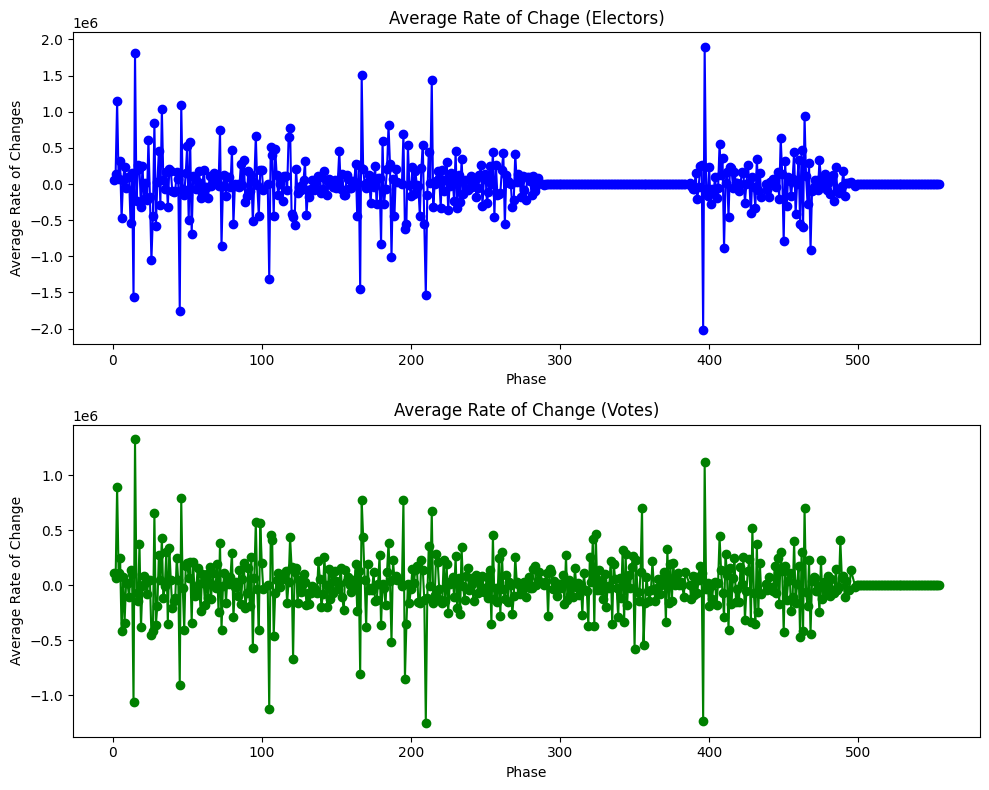

In [44]:
fig, axes = plt.subplots(2,1,figsize=(10,8))
axes[0].plot(data_imputed.index, data_imputed['Average Rate of Change (Electors)'], marker='o', color='blue')
axes[0].set_title('Average Rate of Chage (Electors)')
axes[0].set_xlabel('Phase')
axes[0].set_ylabel('Average Rate of Changes')

axes[1].plot(data_imputed.index, data_imputed['Average Rate of Change (Votes)'], marker='o', color='green')
axes[1].set_title('Average Rate of Change (Votes)')
axes[1].set_xlabel('Phase')
axes[1].set_ylabel('Average Rate of Change')

plt.tight_layout()
plt.show()

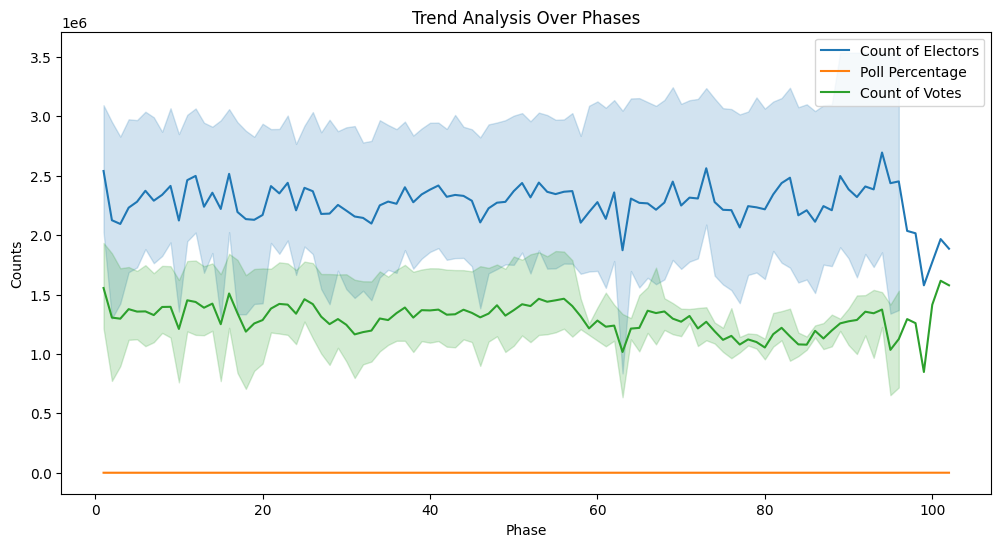

In [45]:
numeric_cols = ['Count of\nElector*', '**Poll (%)', 'Count of\nVotes***', 'Count of Elector*', '**Poll\n(%)', 'Count of Votes***']
data_imputed[numeric_cols] = data_imputed[numeric_cols].apply(pd.to_numeric, errors='coerce')


plt.figure(figsize=(12, 6))
sns.lineplot(data=data_imputed, x='Sl. No.', y='Count of\nElector*', label='Count of Electors')
sns.lineplot(data=data_imputed, x='Sl. No.', y='**Poll (%)', label='Poll Percentage')
sns.lineplot(data=data_imputed, x='Sl. No.', y='Count of\nVotes***', label='Count of Votes')
plt.xlabel('Phase')
plt.ylabel('Counts')
plt.title('Trend Analysis Over Phases')
plt.legend()
plt.show()